<a href="https://colab.research.google.com/github/Mariyyah-Alrasheed/Exercise_week3_T5/blob/main/Ex_DBSCAN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DBSCAN**


#Step 1 : Import Libraries



In [9]:
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np


#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [2]:
clu=[0.60,0.80,1.0,1.60]

In [3]:
X,y_true = make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=clu,random_state=0)

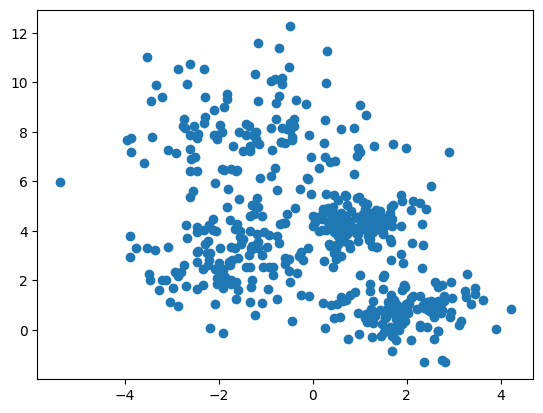

In [4]:
plt.scatter(X[:,0],X[:,1]);

#Step 3 : Modeling The Data Using DBSCAN



In [5]:
dbsm = DBSCAN(eps=0.70,min_samples=5)
dbsm.fit(X)

DBSCAN(eps=0.7)

['y', 'b', 'g', 'r']


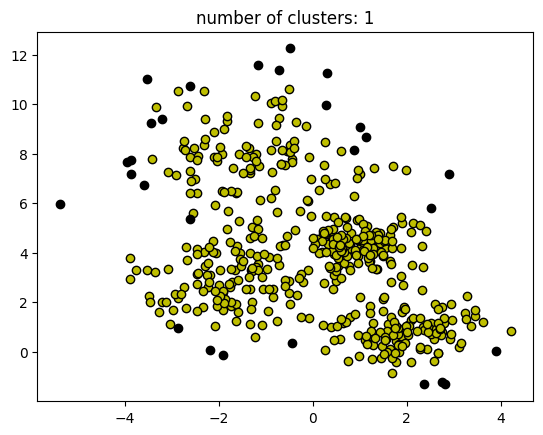

In [13]:
core_samples_mask = np.zeros_like(dbsm.labels_, dtype=bool)
core_samples_mask[dbsm.core_sample_indices_] = True

labels = dbsm.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [14]:
# evaluation metrics
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels) # Import adjusted_rand_score
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.33
Adjusted Rand Index: 0.00


#**Well Done :)**

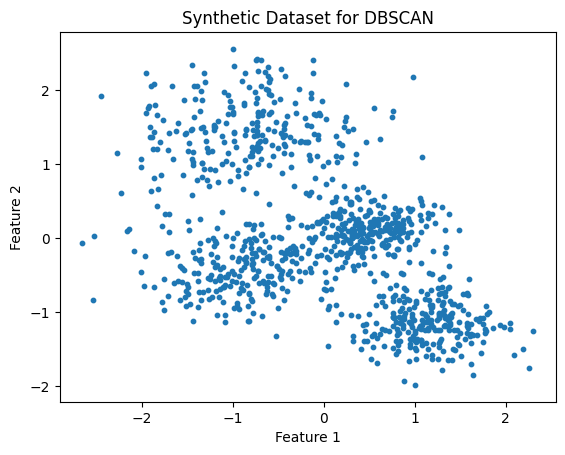

In [15]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from sklearn.preprocessing import StandardScaler

# # Parameters
# n_samples = 1000
# centers = 4
# cluster_std = [0.60, 0.75, 1.00, 1.20]

# # Generate synthetic data
# X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=0)

# # Standardize features
# X = StandardScaler().fit_transform(X)

# # Plot the dataset
# plt.scatter(X[:, 0], X[:, 1], s=10)
# plt.title("Synthetic Dataset for DBSCAN")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.show()
